In [1]:
import opendatasets as od
import os, re, tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
import contractions
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [2]:
# downloading the dataset using opendatasets  
od.download('https://www.kaggle.com/datasets/ramjasmaurya/poem-classification-nlp')

Skipping, found downloaded files in ".\poem-classification-nlp" (use force=True to force download)


reading the data with pd.read_csv, there are only 2 data : train and test <br>
and show the first 5 data

In [3]:
train = pd.read_csv('poem-classification-nlp/Poem_classification - train_data.csv')
test = pd.read_csv('poem-classification-nlp/Poem_classification - test_data.csv')

In [4]:
# show the upper 5 data from train data
train.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [5]:
class_name = train.Genre.unique()
class_name

array(['Music', 'Death', 'Affection', 'Environment'], dtype=object)

In [6]:
# Check the data shape 
print("Train Shape", train.shape)
print("Test Shape", test.shape)

Train Shape (841, 2)
Test Shape (150, 2)


The unique value from Genre are : ['Music', 'Death', 'Affection', 'Environment']

The Total amount of each train and test data are 841 and 150, with both total 991 text data

The 2 cell below purposed to find the missing value in dataset (train and test) 

In [7]:
# check is there a null data in train dataset
print("Train")
train.isnull().sum()

Train


Genre    0
Poem     4
dtype: int64

In [8]:
# check is there a null data in test dataset
print("Test")
test.isnull().sum()

Test


Genre    0
Poem     0
dtype: int64

# Before Drop NaN Column

i want to know the label / Genre distribution by using bar plot, but this code below is the actual datasize. 

In [9]:
# check the label(genre) distribution
train['Genre'].value_counts()

Genre
Music          239
Death          234
Environment    227
Affection      141
Name: count, dtype: int64

<Axes: xlabel='Genre'>

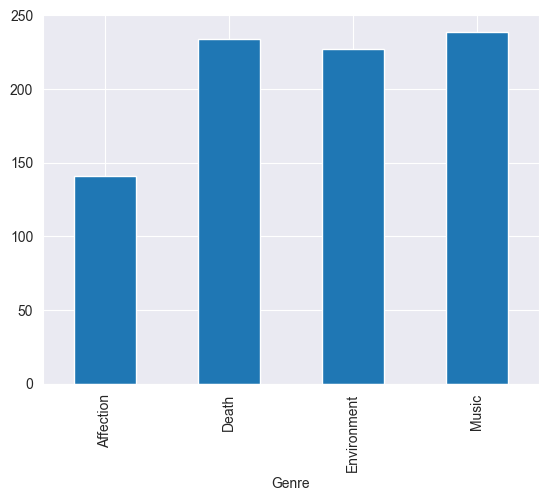

In [10]:
# Plot the label(genre)
train.groupby('Genre').size().plot(kind='bar') 

# After drop NaN Column
there are 4 missing value in the train data, when i look back at my total data, the missing value is only 0.475% of the data, so i can drop the missing value to cleanup the train data. <br>
After dropping the missing value, i want to know the new Genre distribution each class.

In [11]:
# drop the NaN or null using .dropna() method
train = train.dropna()

In [12]:
# Check the new shape after dropping 
train.shape

(837, 2)

In [13]:
# counting the genre distribution after dropping missing value
train['Genre'].value_counts()

Genre
Music          238
Death          231
Environment    227
Affection      141
Name: count, dtype: int64

<Axes: xlabel='Genre'>

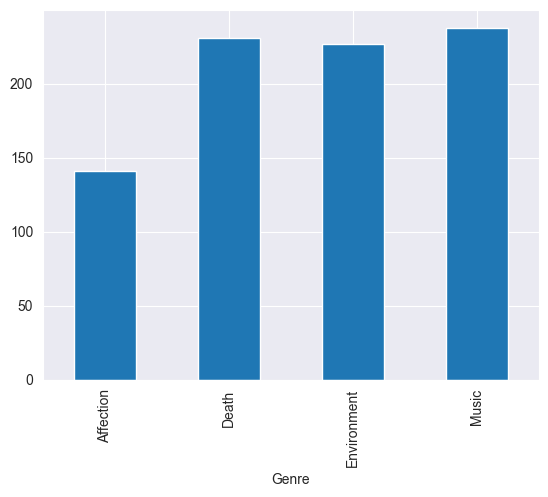

In [14]:
# Plot the label(genre)
train.groupby('Genre').size().plot(kind='bar') 

# Test dataset
do the same thing to show the label distribution on the test data

In [15]:
# check the label(genre) distribution
test['Genre'].value_counts()

Genre
Affection      100
Environment     25
Death           13
Music           12
Name: count, dtype: int64

<Axes: xlabel='Genre'>

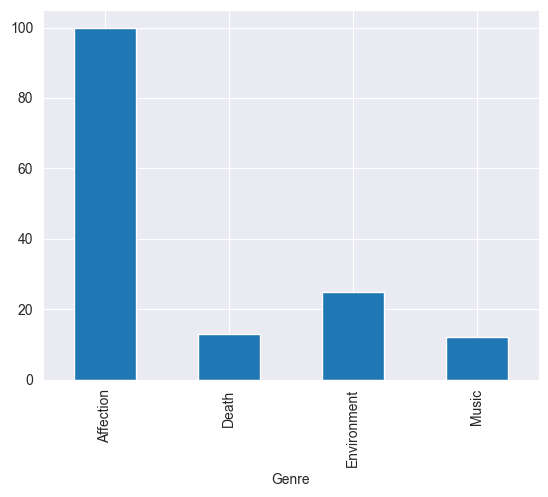

In [16]:
# Plot
test.groupby('Genre').size().plot(kind='bar')

## Sample Text

show the data sample by using random number in range 0 to 150, i determine to 150 because the maximum data from the test data is 150.

In [17]:
# make a random integer in range 0 until 150
n = np.random.randint(0, 150)
n

110

In [18]:
# Get sample from the random number
sample_train = train['Poem'][n]
sample_test = test['Poem'][n]

In [19]:
print("train sample txt:", sample_train)
print("test sample txt:", sample_test)

train sample txt: In the autumn I moved to New York,I recognized her face all over the subwaystations—pearls around her throat, she posesfor her immigration papers. In 1924, the onlyAmericans required to carry identity cardswere ethnically Chinese—the first photo IDs,red targets on the head of every man, woman,child, infant, movie star. Like pallbearers,they
test sample txt: In the middle garden is the secret wedding,that hides always under the other oneand under the shiny things of the other one. Under a treeone hand reaches through the grainy dusk toward another.Two right hands. The ring is a weed that will surely die.


# Text preprocessing
- lowercase 
- remove number and punctuation 
- remove stopwords 
- Lemmatize 

the four function has been created in utils.py, so i can use by importing it to the notebook

for lowercase we use .lower() <br>
for remove number and punctuation we use regular expression <br> 
for remove stopwords we must split the text and find each word is in stop words or not. <br>

In [20]:
# get the clean text function from utils.py 
from utils import clean_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bintang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bintang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bintang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Bintang\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


This cell below is used to apply the preprocessing function to Poem with making a new column named clean_text and then show the first 50 data

In [21]:
# Apply the preprocessing function from utils
train["clean_text"] = train["Poem"].apply(clean_text)
test["clean_text"] = test["Poem"].apply(clean_text)

In [22]:
# show first 50 data after preprocessing
train.head(50)

,Genre,Poem,clean_text
1,Music,In the thick brushthey spend the...,"thick brushthey spend hottest part day, soakin..."
2,Music,Storms are generous. ...,"storms generous something easy surrender to, s..."
3,Music,—After Ana Mendieta Did you carry around the ...,ana mendieta carry around matin star hold fore...
4,Music,for Aja Sherrard at 20The portent may itself ...,aja sherrard portent may memory wallace steven...
5,Music,"for Bob Marley, Bavaria, November 1980 Here i...","bob marley, bavaria, november brilliant mornin..."
6,Music,For Frank X WalkerFXW: I don’t know how to sw...,frank x walkerfxw know swim fxw pools black fo...
7,Music,My neighbor to the left had a stroke a couple...,neighbor left stroke couple years ago look lik...
8,Music,—for a sixty-seven-pound nugget of Lake Superi...,sixty seven pound nugget lake superior copperf...
9,Music,—Issa Rae Everybody Black is my hometown team....,issa rae everybody black hometown team everybo...
10,Music,"""Save your hands,” my mother says, seeing me u...","""save hands,” mother says, seeing untwist jar ..."


Encoding the Genre using label encoder, first let the LabelEncoder trained all 4 labels, and then use LabelEncoder to transform all the value inside the label(Genre)<br>
After transforming the label, then show the label mapping and then show the first 5 data.

In [23]:
# use the label encoder form scikit learn to transform text label to numeric based on the alphabet order
le = LabelEncoder()
le.fit(class_name)

LabelEncoder()

In [24]:
# transform all the labels 
train['label'] = le.transform(train.Genre)
test['label'] = le.transform(test.Genre)

In [25]:
# Check the label mapping
label_mapping = {index: label for index, label in enumerate(le.classes_)}
label_mapping

{0: 'Affection', 1: 'Death', 2: 'Environment', 3: 'Music'}

In [26]:
# show the first 5 data in train 
train.head(5)

,Genre,Poem,clean_text,label
1,Music,In the thick brushthey spend the...,"thick brushthey spend hottest part day, soakin...",3
2,Music,Storms are generous. ...,"storms generous something easy surrender to, s...",3
3,Music,—After Ana Mendieta Did you carry around the ...,ana mendieta carry around matin star hold fore...,3
4,Music,for Aja Sherrard at 20The portent may itself ...,aja sherrard portent may memory wallace steven...,3
5,Music,"for Bob Marley, Bavaria, November 1980 Here i...","bob marley, bavaria, november brilliant mornin...",3


Grab the clean_text column and the label for features and label. <br>
After splitting data and store it to new variable, then delete the **train** and **test** variable to reduce memory usage

In [27]:
# grab the clean_text and label for the feature and label 
x_train = train['clean_text']
x_test = test['clean_text']

y_train = train['label']
y_test = test['label']

In [28]:
# delete the old train and test, because it is no longer used after Tokenization
del train, test

# Tokenization

In [29]:
# import the tensorflow library to tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [30]:
# create the tokenizer, num of words is 1k and set the out of vocabulary token
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)

# make the text as sequences
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# the actual vocab size is the length of word index + 1
vocab_size = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index
print(vocab_size)

8465


tokenizer were created with 1k words and OOV token is set and then train to the **train** text.<br>
After fitted to **train** data, the i use the `text_to_sequences()` method to change the `x_train` and `x_test` from text to 1D array. 

The code cell below is to make the padding and cast the datatype to numpy array.<br>
To make the padding, i use `pad_sequences()` method with maximum length is 200 and post pad. Also make the train label is categorical. 

In [31]:
# make a padding for the array sequences with maximum length is 200
x_train = pad_sequences(x_train, padding='post', maxlen=200, truncating='post')
x_test = pad_sequences(x_test, padding='post', maxlen=200, truncating='post')

In [32]:
# cast as numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)

In [33]:
# make the label as categorical
y_train = to_categorical(y_train)

# Model

The first model i create is the Convolutional model, but in case of text or NLP we must use Embedding for input layer. with paramter is vocab size, filters, and input length.<br>
After input layer, use the Conv1D layer, the output from the input layer is 1D array, parameter on the convolutional layer are filters=64, kernel size=5, padding=causal, activation=relu.<br>
The next layer are `GlobalAveragePooling1D()', 1 Fully Connected Layer and Output layer. The FC layer has 64 neurons with relu activation. 


In [34]:
# Building model using Convolutional 1 Dimension with padding = causal.
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(vocab_size, 128, input_length=200), 
    tf.keras.layers.Conv1D(64, 5, padding='causal', activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1083520   
                                                                 
 conv1d (Conv1D)             (None, 200, 64)           41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1,128,964
Trainable params: 1,128,964
Non-trainable params: 0
______________________________________________

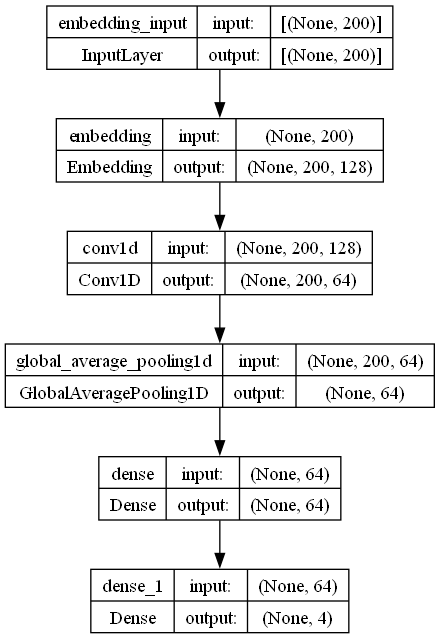

In [35]:
# plot the model as image
tf.keras.utils.plot_model(model, show_shapes=True)

This cell is for show the compute devices that available.

In [36]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [37]:
# compile the model using Adaptive Algorithm optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [38]:
# train the model
H = model.fit(
    x_train, y_train,
    verbose=2,
    epochs=250,
    batch_size=128
)

Epoch 1/250
7/7 - 2s - loss: 1.3837 - accuracy: 0.2808 - 2s/epoch - 270ms/step
Epoch 2/250
7/7 - 0s - loss: 1.3812 - accuracy: 0.3106 - 111ms/epoch - 16ms/step
Epoch 3/250
7/7 - 0s - loss: 1.3792 - accuracy: 0.3214 - 112ms/epoch - 16ms/step
Epoch 4/250
7/7 - 0s - loss: 1.3771 - accuracy: 0.3178 - 107ms/epoch - 15ms/step
Epoch 5/250
7/7 - 0s - loss: 1.3751 - accuracy: 0.3166 - 108ms/epoch - 15ms/step
Epoch 6/250
7/7 - 0s - loss: 1.3733 - accuracy: 0.3178 - 107ms/epoch - 15ms/step
Epoch 7/250
7/7 - 0s - loss: 1.3712 - accuracy: 0.3190 - 108ms/epoch - 15ms/step
Epoch 8/250
7/7 - 0s - loss: 1.3693 - accuracy: 0.3226 - 109ms/epoch - 16ms/step
Epoch 9/250
7/7 - 0s - loss: 1.3674 - accuracy: 0.3501 - 107ms/epoch - 15ms/step
Epoch 10/250
7/7 - 0s - loss: 1.3653 - accuracy: 0.4229 - 108ms/epoch - 15ms/step
Epoch 11/250
7/7 - 0s - loss: 1.3633 - accuracy: 0.3883 - 109ms/epoch - 16ms/step
Epoch 12/250
7/7 - 0s - loss: 1.3610 - accuracy: 0.3620 - 109ms/epoch - 16ms/step
Epoch 13/250
7/7 - 0s - los

# Evaluation

Evaluation using the plot of training accuracy nad loss, confusion matrix, and classification report.<br>
As you can see in the cell below, this evaluation is for Convolutional model that has been trained before.


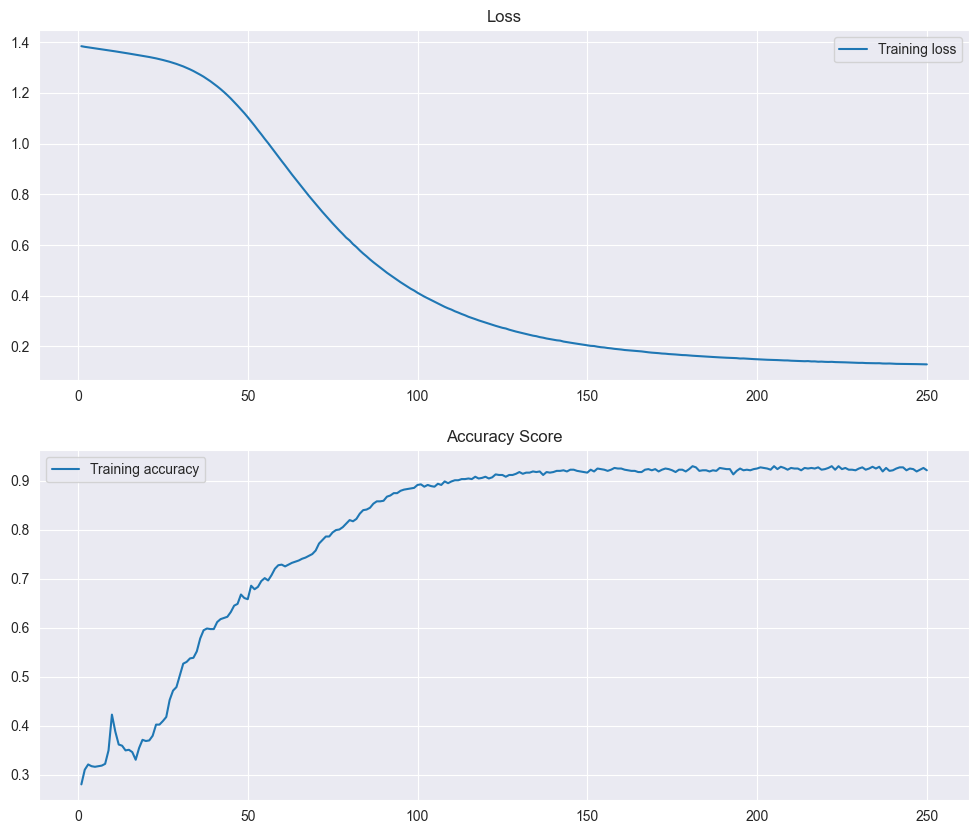

In [39]:
# plot the training loss and accuracy
N = len(H.history['loss']) + 1

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
ax = ax.flatten()

ax[0].plot(np.arange(1, N), H.history["loss"], label="Training loss")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(np.arange(1, N), H.history["accuracy"], label="Training accuracy")
ax[1].title.set_text("Accuracy Score")
ax[1].legend()

plt.show()

from the result of training, the Convolutional model learning very well, the model increasing the accuracy as the epoch count. and also the loss, the model has decrease the loss.

In [40]:
# make a prediction from the test data (argmax to find the max value, it means the class with higher accuracy confidence)
predict = model.predict(x_test)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

5/5 [==============================] - 0s 6ms/step


array([3, 2, 1, 0, 1, 3, 0, 3, 2, 3, 2, 3, 3, 2, 0, 3, 0, 3, 1, 2, 2, 2,
       2, 3, 3, 3, 0, 0, 0, 0, 0, 3, 2, 2, 3, 2, 3, 0, 1, 1, 3, 2, 1, 1,
       0, 2, 2, 2, 1, 2, 1, 1, 1, 3, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 3, 3, 1, 3, 3, 1, 1, 1, 0, 1, 1, 3, 2, 2, 2, 3, 3,
       2, 3, 1, 0, 2, 0, 1, 3, 2, 3, 1, 3, 3, 2, 0, 1, 1, 3, 0, 0, 2, 3,
       1, 1, 2, 3, 3, 1, 3, 3, 1, 0, 3, 0, 0, 3, 0, 3, 1, 3, 2, 3, 2, 1,
       2, 0, 1, 2, 2, 0, 1, 3, 2, 1, 2, 3, 3, 0, 2, 1, 2, 2], dtype=int64)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

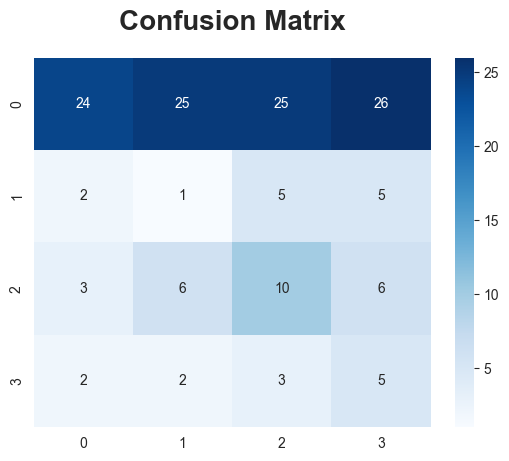

In [42]:
# plot the confusion matrix
cm = confusion_matrix(y_test, predict_class)
disp_log = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Confusion Matrix", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

In [43]:
print(classification_report(y_test, predict_class, target_names=class_name))

              precision    recall  f1-score   support

       Music       0.77      0.24      0.37       100
       Death       0.03      0.08      0.04        13
   Affection       0.23      0.40      0.29        25
 Environment       0.12      0.42      0.19        12

    accuracy                           0.27       150
   macro avg       0.29      0.28      0.22       150
weighted avg       0.57      0.27      0.31       150



The result of the evaluation is "Convolutional model has reach 0.27 or 27% test accuracy". this result shown a "Overfitting" condition.the last accuracy when training is around more than 90%, but when make a prediction using test data, the model only can reach 27% accuracy. 

# Model

After creating the Convolutional model, i want to compare with Bidirectional LSTM model. with same input layer but the main differences is this model is using 2 BRNN with 32 Neuron each LSTM Layer and return the sequences. <br>
the return of BRRN is 2D array, so i use `Flatten()` to make the 2D became 1D array.<br>
I also use the same FC layer and output layer as the Convolutional Model.   

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1083520   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 64)          41216     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 64)          24832     
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                819264    
                                                                 
 dense_3 (Dense)             (None, 4)                

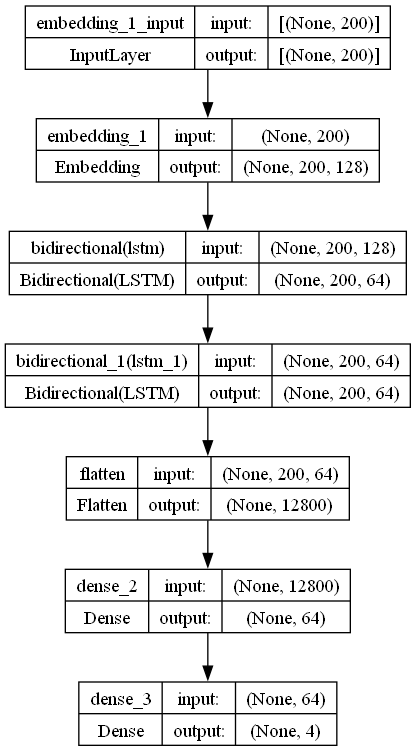

In [44]:
# Building model using Bidirectional Recurrent Neural Network with LSTM Layer
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=200), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

model_lstm.summary()

# print the model as image
tf.keras.utils.plot_model(model_lstm, show_shapes=True)

In [45]:
# compile the model using Adaptive Algorithm optimizer
model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [46]:
# train the model
H = model.fit(
    x_train, y_train,
    verbose=2,
    epochs=250,
    batch_size=128
)

Epoch 1/250
7/7 - 0s - loss: 0.1292 - accuracy: 0.9211 - 127ms/epoch - 18ms/step
Epoch 2/250
7/7 - 0s - loss: 0.1292 - accuracy: 0.9271 - 127ms/epoch - 18ms/step
Epoch 3/250
7/7 - 0s - loss: 0.1281 - accuracy: 0.9247 - 127ms/epoch - 18ms/step
Epoch 4/250
7/7 - 0s - loss: 0.1278 - accuracy: 0.9259 - 125ms/epoch - 18ms/step
Epoch 5/250
7/7 - 0s - loss: 0.1275 - accuracy: 0.9283 - 126ms/epoch - 18ms/step
Epoch 6/250
7/7 - 0s - loss: 0.1275 - accuracy: 0.9235 - 125ms/epoch - 18ms/step
Epoch 7/250
7/7 - 0s - loss: 0.1271 - accuracy: 0.9247 - 127ms/epoch - 18ms/step
Epoch 8/250
7/7 - 0s - loss: 0.1269 - accuracy: 0.9223 - 125ms/epoch - 18ms/step
Epoch 9/250
7/7 - 0s - loss: 0.1264 - accuracy: 0.9223 - 126ms/epoch - 18ms/step
Epoch 10/250
7/7 - 0s - loss: 0.1264 - accuracy: 0.9223 - 127ms/epoch - 18ms/step
Epoch 11/250
7/7 - 0s - loss: 0.1264 - accuracy: 0.9259 - 124ms/epoch - 18ms/step
Epoch 12/250
7/7 - 0s - loss: 0.1267 - accuracy: 0.9283 - 124ms/epoch - 18ms/step
Epoch 13/250
7/7 - 0s - l

# Evaluation

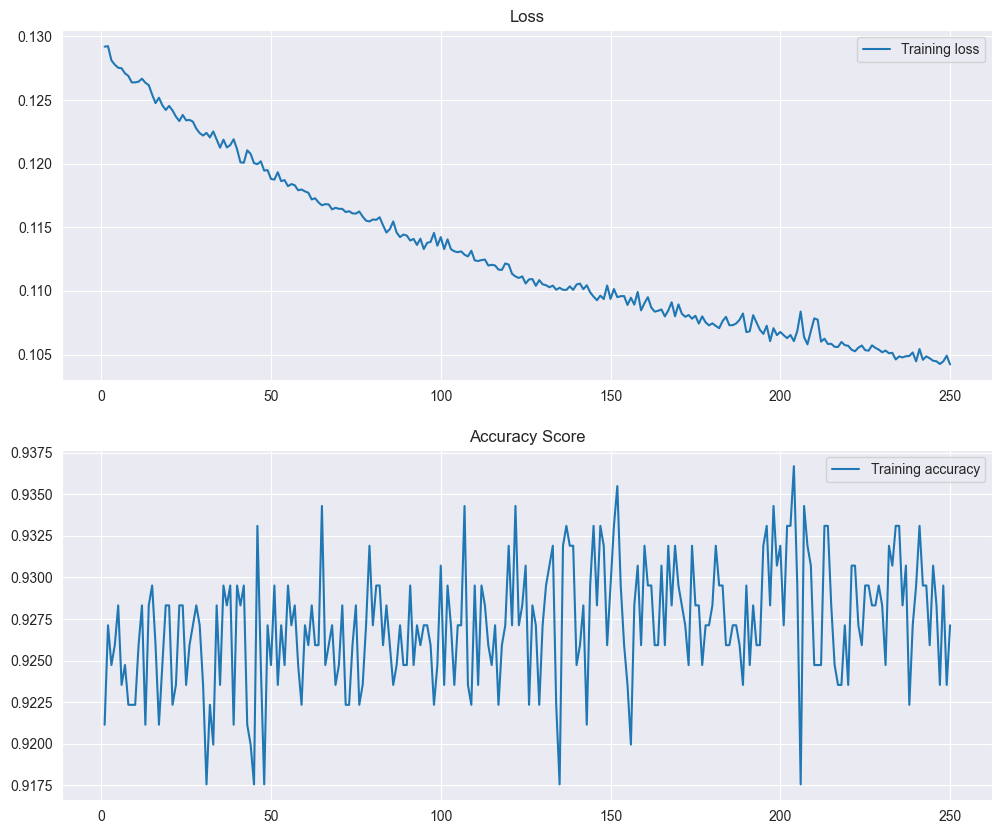

In [47]:
# plot the training accuracy and loss
N = len(H.history['loss']) + 1

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
ax = ax.flatten()

ax[0].plot(np.arange(1, N), H.history["loss"], label="Training loss")
ax[0].title.set_text("Loss")
ax[0].legend()

ax[1].plot(np.arange(1, N), H.history["accuracy"], label="Training accuracy")
ax[1].title.set_text("Accuracy Score")
ax[1].legend()

plt.show()

From the result of BRNN LSTM training, i can conclude that this model has a great accuracy and very low loss from the beginning. <br>
From epoch 0 we can see the model has around 92% accuracy and 12.9% loss. Which is make it better than convolutional model.

let's see the confusion matrix and `classification_report()` under this section

In [48]:
# make a prediction using the test data
predict = model_lstm.predict(x_test)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

5/5 [==============================] - 1s 37ms/step


array([2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0], dtype=int64)

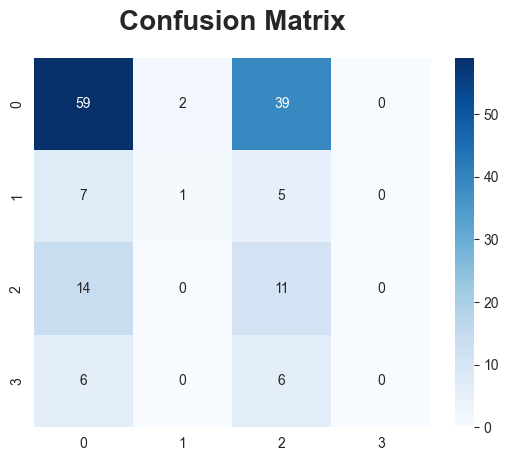

In [49]:
# Plot confusion matrix
cm = confusion_matrix(y_test, predict_class)
disp_log = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("Confusion Matrix", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

The result of the confusion matrix show that this BRNN LSTM model has better accuracy from 100 total data in class "Affection" there are 59 data are predicted as the actual class.<br>
For more information we can see from `classification_report()` below. 

In [50]:
print(classification_report(y_test, predict_class, target_names=class_name))

              precision    recall  f1-score   support

       Music       0.69      0.59      0.63       100
       Death       0.33      0.08      0.12        13
   Affection       0.18      0.44      0.26        25
 Environment       0.00      0.00      0.00        12

    accuracy                           0.47       150
   macro avg       0.30      0.28      0.25       150
weighted avg       0.52      0.47      0.48       150



C:\a-dev\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\a-dev\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\a-dev\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
